# Plot timings from CESM/NorESM runs on Betzy

In [1]:
import glob

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
font = {
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)

## Get number of processors

In [3]:
def get_nprocs(buffer):
    answer = buffer.find('pe count for cost estimate')
    nb_processors = int(buffer[answer:].split("\n")[0].split(":")[1])
    return nb_processors

## Get Model Cost

In [4]:
def get_modelcost(buffer):
    answer = buffer.find('Model Cost')
    model_cost = float((buffer[answer:].split("\n")[0].split(":")[1]).split('pe-hrs/simulated_year')[0])
    return model_cost    

## Get Model throughput

In [5]:
def get_modelthroughput(buffer):
    answer = buffer.find('Model Throughput')
    model_throughput = float((buffer[answer:].split("\n")[0].split(":")[1]).split('simulated_years/day')[0])
    return model_throughput    

## Init time

In [6]:
def get_initime(buffer):
    answer = buffer.find('Init Time')
    model_init_time = float((buffer[answer:].split("\n")[0].split(":")[1]).split('seconds')[0])
    return model_init_time   

## Run Time

In [7]:
def get_runtime(buffer):
    answer = buffer.find('Run Time')
    model_runtime = float((buffer[answer:].split("\n")[0].split(":")[1]).split('seconds')[0])
    return model_runtime   

## Final Time

In [8]:
def get_finaltime(buffer):
    answer = buffer.find('Final Time')
    model_finaltime = float((buffer[answer:].split("\n")[0].split(":")[1]).split('seconds')[0])
    return model_finaltime   

## Extract timing information for one case


In [9]:
def get_timing(platform_case, esm_case, container, filename, dframe):
    print(filename)
    f = open(filename, "r")
    buffer = f.read()
    data = {'platform': platform_case,
            'case': esm_case,
            'pe-count':  get_nprocs(buffer),
            'cost': get_modelcost(buffer),
            'throughput': get_modelthroughput(buffer),
            'initime': get_initime(buffer),
            'runtime': get_runtime(buffer),
            'type': container,
            'finaltime': get_finaltime(buffer),
        }
    return dframe.append(data, ignore_index=True)

In [10]:
def get_timings_from_files(platform_case, esm_case, container, df):
    files_to_list = "timings/cesm_timing." + platform_case + "-*-" + esm_case + "*"
    files = glob.glob(files_to_list)
    for file in files:
        df = get_timing(platform_case, esm_case, container, file, df)
    return df

## Create pandas dataframe to be filled with timings

In [11]:
columns = ['platform', 'case', 'pe-count', 'cost', 'throughput', 'initime', 'runtime', 'finaltime', 'type']
df = pd.DataFrame (columns = columns)

## Go through files to get timings

#### GNU NORESM bare metal

In [12]:
platform_case = "betzy_gnu-noresm"
esm_case = "NF2000climo-f19_f19_mg17"
df = get_timings_from_files(platform_case, esm_case, 'bare metal', df)

timings/cesm_timing.betzy_gnu-noresm-5x128p-NF2000climo-f19_f19_mg17.184961.210522-094055
timings/cesm_timing.betzy_gnu-noresm-8x128p-NF2000climo-f19_f19_mg17.184959.210522-094047
timings/cesm_timing.betzy_gnu-noresm-5x128p-NF2000climo-f19_f19_mg17.171240.210406-190459
timings/cesm_timing.betzy_gnu-noresm-1x128p-NF2000climo-f19_f19_mg17.169973.210406-005316
timings/cesm_timing.betzy_gnu-noresm-7x128p-NF2000climo-f19_f19_mg17.184978.210522-103156
timings/cesm_timing.betzy_gnu-noresm-7x128p-NF2000climo-f19_f19_mg17.184997.210522-110741
timings/cesm_timing.betzy_gnu-noresm-2x128p-NF2000climo-f19_f19_mg17.169971.210406-003815
timings/cesm_timing.betzy_gnu-noresm-8x128p-NF2000climo-f19_f19_mg17.184912.210522-090358
timings/cesm_timing.betzy_gnu-noresm-7x128p-NF2000climo-f19_f19_mg17.184949.210522-091856
timings/cesm_timing.betzy_gnu-noresm-7x128p-NF2000climo-f19_f19_mg17.184965.210522-095434
timings/cesm_timing.betzy_gnu-noresm-6x128p-NF2000climo-f19_f19_mg17.184998.210522-110741
timings/ce

#### Intel NorEMS bare metal

In [13]:
platform_case = "betzy-noresm"
esm_case = "NF2000climo-f19_f19_mg17"
df = get_timings_from_files(platform_case, esm_case, 'bare metal', df)

timings/cesm_timing.betzy-noresm-6x128p-NF2000climo-f19_f19_mg17.184834.210522-012646
timings/cesm_timing.betzy-noresm-1x128p-NF2000climo-f19_f19_mg17.184818.210522-062944
timings/cesm_timing.betzy-noresm-4x128p-NF2000climo-f19_f19_mg17.184804.210522-050240
timings/cesm_timing.betzy-noresm-5x128p-NF2000climo-f19_f19_mg17.184904.210522-021233
timings/cesm_timing.betzy-noresm-1x128p-NF2000climo-f19_f19_mg17.184815.210522-053011
timings/cesm_timing.betzy-noresm-2x128p-NF2000climo-f19_f19_mg17.184768.210522-022431
timings/cesm_timing.betzy-noresm-3x128p-NF2000climo-f19_f19_mg17.184778.210522-030803
timings/cesm_timing.betzy-noresm-7x128p-NF2000climo-f19_f19_mg17.184894.210522-020617
timings/cesm_timing.betzy-noresm-8x128p-NF2000climo-f19_f19_mg17.184864.210522-014802
timings/cesm_timing.betzy-noresm-4x128p-NF2000climo-f19_f19_mg17.184796.210522-043240
timings/cesm_timing.betzy-noresm-3x128p-NF2000climo-f19_f19_mg17.184752.210522-010606
timings/cesm_timing.betzy-noresm-8x128p-NF2000climo-f1

timings/cesm_timing.betzy-noresm-4x128p-NF2000climo-f19_f19_mg17.184898.210522-021114
timings/cesm_timing.betzy-noresm-4x128p-NF2000climo-f19_f19_mg17.184790.210522-041039


#### GNU NorESM container with MPICH

In [14]:
platform_case = "noresm-gnu-ucx-mpich-container"
esm_case = "NF2000climo-f19_f19_mg17"
df = get_timings_from_files(platform_case, esm_case, 'singularity', df)

timings/cesm_timing.noresm-gnu-ucx-mpich-container-2x128p-NF2000climo-f19_f19_mg17.210521.052156
timings/cesm_timing.noresm-gnu-ucx-mpich-container-8x128p-NF2000climo-f19_f19_mg17.210521.205317
timings/cesm_timing.noresm-gnu-ucx-mpich-container-2x128p-NF2000climo-f19_f19_mg17.210521.061009
timings/cesm_timing.noresm-gnu-ucx-mpich-container-6x128p-NF2000climo-f19_f19_mg17.210521.102057
timings/cesm_timing.noresm-gnu-ucx-mpich-container-4x128p-NF2000climo-f19_f19_mg17.210521.222759
timings/cesm_timing.noresm-gnu-ucx-mpich-container-3x128p-NF2000climo-f19_f19_mg17.210521.062041
timings/cesm_timing.noresm-gnu-ucx-mpich-container-3x128p-NF2000climo-f19_f19_mg17.210520.235744
timings/cesm_timing.noresm-gnu-ucx-mpich-container-7x128p-NF2000climo-f19_f19_mg17.210520.175307
timings/cesm_timing.noresm-gnu-ucx-mpich-container-6x128p-NF2000climo-f19_f19_mg17.210406.183834
timings/cesm_timing.noresm-gnu-ucx-mpich-container-1x128p-NF2000climo-f19_f19_mg17.210521.033250
timings/cesm_timing.noresm-gnu

timings/cesm_timing.noresm-gnu-ucx-mpich-container-7x128p-NF2000climo-f19_f19_mg17.210521.225856
timings/cesm_timing.noresm-gnu-ucx-mpich-container-2x128p-NF2000climo-f19_f19_mg17.210521.021031
timings/cesm_timing.noresm-gnu-ucx-mpich-container-5x128p-NF2000climo-f19_f19_mg17.210523.013613
timings/cesm_timing.noresm-gnu-ucx-mpich-container-6x128p-NF2000climo-f19_f19_mg17.210521.204642
timings/cesm_timing.noresm-gnu-ucx-mpich-container-6x128p-NF2000climo-f19_f19_mg17.210520.223057
timings/cesm_timing.noresm-gnu-ucx-mpich-container-1x128p-NF2000climo-f19_f19_mg17.210520.175507
timings/cesm_timing.noresm-gnu-ucx-mpich-container-2x128p-NF2000climo-f19_f19_mg17.210521.043355
timings/cesm_timing.noresm-gnu-ucx-mpich-container-2x128p-NF2000climo-f19_f19_mg17.210406.182641
timings/cesm_timing.noresm-gnu-ucx-mpich-container-2x128p-NF2000climo-f19_f19_mg17.210521.025805
timings/cesm_timing.noresm-gnu-ucx-mpich-container-1x128p-NF2000climo-f19_f19_mg17.210521.024447
timings/cesm_timing.noresm-gnu

#### GNU NorESM container with OpenMPI

In [15]:
platform_case = "noresm-gnu-ucx-openmpi-container"
esm_case = "NF2000climo-f19_f19_mg17"
df = get_timings_from_files(platform_case, esm_case,'singularity', df)

timings/cesm_timing.noresm-gnu-ucx-openmpi-container-1x128p-NF2000climo-f19_f19_mg17.210522.210416
timings/cesm_timing.noresm-gnu-ucx-openmpi-container-3x128p-NF2000climo-f19_f19_mg17.210522.215232
timings/cesm_timing.noresm-gnu-ucx-openmpi-container-6x128p-NF2000climo-f19_f19_mg17.210522.203949
timings/cesm_timing.noresm-gnu-ucx-openmpi-container-4x128p-NF2000climo-f19_f19_mg17.210522.173517
timings/cesm_timing.noresm-gnu-ucx-openmpi-container-5x128p-NF2000climo-f19_f19_mg17.210522.210830
timings/cesm_timing.noresm-gnu-ucx-openmpi-container-7x128p-NF2000climo-f19_f19_mg17.210522.225544
timings/cesm_timing.noresm-gnu-ucx-openmpi-container-1x128p-NF2000climo-f19_f19_mg17.210522.212538
timings/cesm_timing.noresm-gnu-ucx-openmpi-container-2x128p-NF2000climo-f19_f19_mg17.210522.173715
timings/cesm_timing.noresm-gnu-ucx-openmpi-container-6x128p-NF2000climo-f19_f19_mg17.210522.211734
timings/cesm_timing.noresm-gnu-ucx-openmpi-container-6x128p-NF2000climo-f19_f19_mg17.210522.200951
timings/ce

timings/cesm_timing.noresm-gnu-ucx-openmpi-container-5x128p-NF2000climo-f19_f19_mg17.210522.204025
timings/cesm_timing.noresm-gnu-ucx-openmpi-container-5x128p-NF2000climo-f19_f19_mg17.210522.212834
timings/cesm_timing.noresm-gnu-ucx-openmpi-container-6x128p-NF2000climo-f19_f19_mg17.210522.205029
timings/cesm_timing.noresm-gnu-ucx-openmpi-container-5x128p-NF2000climo-f19_f19_mg17.210522.214414
timings/cesm_timing.noresm-gnu-ucx-openmpi-container-4x128p-NF2000climo-f19_f19_mg17.210522.215343
timings/cesm_timing.noresm-gnu-ucx-openmpi-container-7x128p-NF2000climo-f19_f19_mg17.210522.200913
timings/cesm_timing.noresm-gnu-ucx-openmpi-container-2x128p-NF2000climo-f19_f19_mg17.210522.213826
timings/cesm_timing.noresm-gnu-ucx-openmpi-container-5x128p-NF2000climo-f19_f19_mg17.210522.205033
timings/cesm_timing.noresm-gnu-ucx-openmpi-container-4x128p-NF2000climo-f19_f19_mg17.210522.225724
timings/cesm_timing.noresm-gnu-ucx-openmpi-container-7x128p-NF2000climo-f19_f19_mg17.210522.221202
timings/ce

#### Intel NorESM container with OpenMPI

In [16]:
platform_case = "noresm-intel-openmpi-container"
esm_case = "NF2000climo-f19_f19_mg17"
df = get_timings_from_files(platform_case, esm_case, 'singularity', df)

timings/cesm_timing.noresm-intel-openmpi-container-7x128p-NF2000climo-f19_f19_mg17.210523.235020
timings/cesm_timing.noresm-intel-openmpi-container-4x128p-NF2000climo-f19_f19_mg17.210524.060912
timings/cesm_timing.noresm-intel-openmpi-container-8x128p-NF2000climo-f19_f19_mg17.210524.003837
timings/cesm_timing.noresm-intel-openmpi-container-5x128p-NF2000climo-f19_f19_mg17.210523.233406
timings/cesm_timing.noresm-intel-openmpi-container-7x128p-NF2000climo-f19_f19_mg17.210524.000852
timings/cesm_timing.noresm-intel-openmpi-container-4x128p-NF2000climo-f19_f19_mg17.210523.225756
timings/cesm_timing.noresm-intel-openmpi-container-7x128p-NF2000climo-f19_f19_mg17.210524.002232
timings/cesm_timing.noresm-intel-openmpi-container-6x128p-NF2000climo-f19_f19_mg17.210523.225153
timings/cesm_timing.noresm-intel-openmpi-container-4x128p-NF2000climo-f19_f19_mg17.210524.054209
timings/cesm_timing.noresm-intel-openmpi-container-5x128p-NF2000climo-f19_f19_mg17.210523.235429
timings/cesm_timing.noresm-int

timings/cesm_timing.noresm-intel-openmpi-container-1x128p-NF2000climo-f19_f19_mg17.210524.010657
timings/cesm_timing.noresm-intel-openmpi-container-2x128p-NF2000climo-f19_f19_mg17.210524.040222
timings/cesm_timing.noresm-intel-openmpi-container-6x128p-NF2000climo-f19_f19_mg17.210524.005911
timings/cesm_timing.noresm-intel-openmpi-container-4x128p-NF2000climo-f19_f19_mg17.210523.233435


#### Intel NorESM container with MPICH

In [17]:
platform_case = "noresm-intel-mpich-container"
esm_case = "NF2000climo-f19_f19_mg17"
df = get_timings_from_files(platform_case, esm_case, 'singularity', df)

timings/cesm_timing.noresm-intel-mpich-container-6x128p-NF2000climo-f19_f19_mg17-185773.210524.141850
timings/cesm_timing.noresm-intel-mpich-container-1x128p-NF2000climo-f19_f19_mg17-185693.210524.235529
timings/cesm_timing.noresm-intel-mpich-container-2x128p-NF2000climo-f19_f19_mg17-185683.210524.203529
timings/cesm_timing.noresm-intel-mpich-container-7x128p-NF2000climo-f19_f19_mg17-185726.210524.131645
timings/cesm_timing.noresm-intel-mpich-container-2x128p-NF2000climo-f19_f19_mg17-185686.210524.212737
timings/cesm_timing.noresm-intel-mpich-container-4x128p-NF2000climo-f19_f19_mg17-185703.210524.131532
timings/cesm_timing.noresm-intel-mpich-container-1x128p-NF2000climo-f19_f19_mg17-185696.210525.011343
timings/cesm_timing.noresm-intel-mpich-container-7x128p-NF2000climo-f19_f19_mg17-185730.210524.131643
timings/cesm_timing.noresm-intel-mpich-container-7x128p-NF2000climo-f19_f19_mg17-185661.210524.130208
timings/cesm_timing.noresm-intel-mpich-container-6x128p-NF2000climo-f19_f19_mg17-1

In [18]:
df.to_csv('timings_betzy.csv', index=False)

## Plot timings

In [19]:
df

,platform,case,pe-count,cost,throughput,initime,runtime,finaltime,type
0,betzy_gnu-noresm,NF2000climo-f19_f19_mg17,640,764.91,20.08,71.675,365.427,0.065,bare metal
1,betzy_gnu-noresm,NF2000climo-f19_f19_mg17,1024,851.91,28.85,73.073,254.369,0.098,bare metal
2,betzy_gnu-noresm,NF2000climo-f19_f19_mg17,640,763.46,20.12,82.228,364.735,0.122,bare metal
3,betzy_gnu-noresm,NF2000climo-f19_f19_mg17,128,609.34,5.04,84.778,1455.521,0.121,bare metal
4,betzy_gnu-noresm,NF2000climo-f19_f19_mg17,896,808.93,26.58,65.849,276.040,0.013,bare metal
...,...,...,...,...,...,...,...,...,...
624,noresm-intel-mpich-container,NF2000climo-f19_f19_mg17,256,498.13,12.33,129.665,594.942,0.004,singularity
625,noresm-intel-mpich-container,NF2000climo-f19_f19_mg17,768,665.01,27.72,130.349,264.751,0.007,singularity
626,noresm-intel-mpich-container,NF2000climo-f19_f19_mg17,1024,697.78,35.22,123.672,208.347,0.006,singularity
627,noresm-intel-mpich-container,NF2000climo-f19_f19_mg17,1024,696.03,35.31,125.355,207.825,0.009,singularity


In [20]:
def make_plot(df, colname, title, ylabel):
    fig = plt.figure(1, figsize=[15,10])
    sns.lineplot(data=df, x="pe-count", y=colname, hue="platform", style="type", ci='sd')
    plt.xlabel("Number of CPUs")
    plt.ylabel(ylabel)
    plt.title(title + "\n")
    plt.legend(["Bare metal (GNU OpenMPI)", "Bare metal (Intel OpenMPI)", "Singularity (GNU MPICH/UCX)", "Singularity (GNU OpenMPI/UCX)", "Singularity (Intel OpenMPI/UCX)", "Singularity (Intel MPICH/UCX)"])
    plt.savefig(colname + ".png")

### Plot Model cost

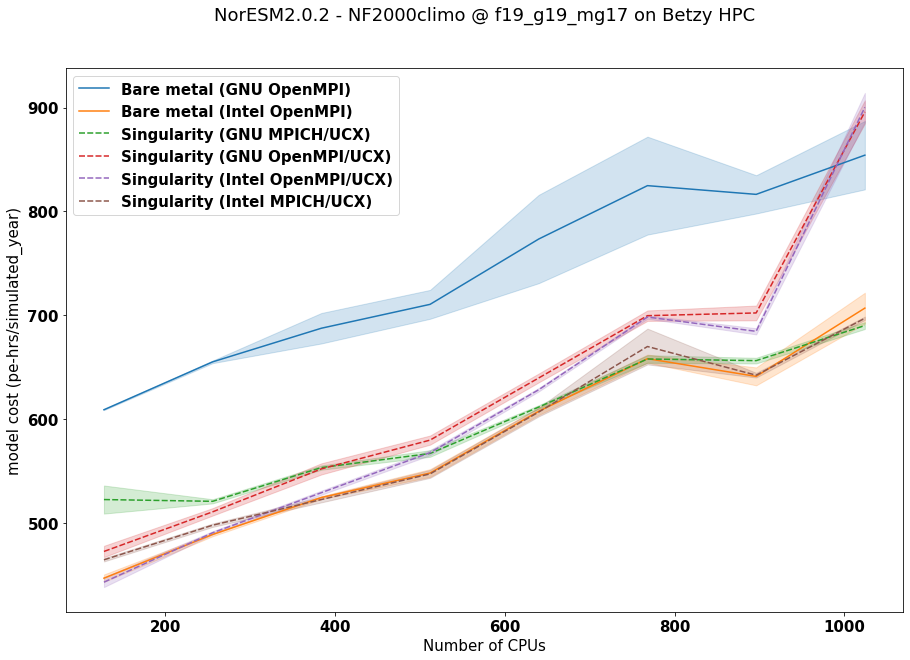

In [21]:
make_plot(df, 'cost', "NorESM2.0.2 - NF2000climo @ f19_g19_mg17 on Betzy HPC\n", "model cost (pe-hrs/simulated_year)")

### Model Throughput

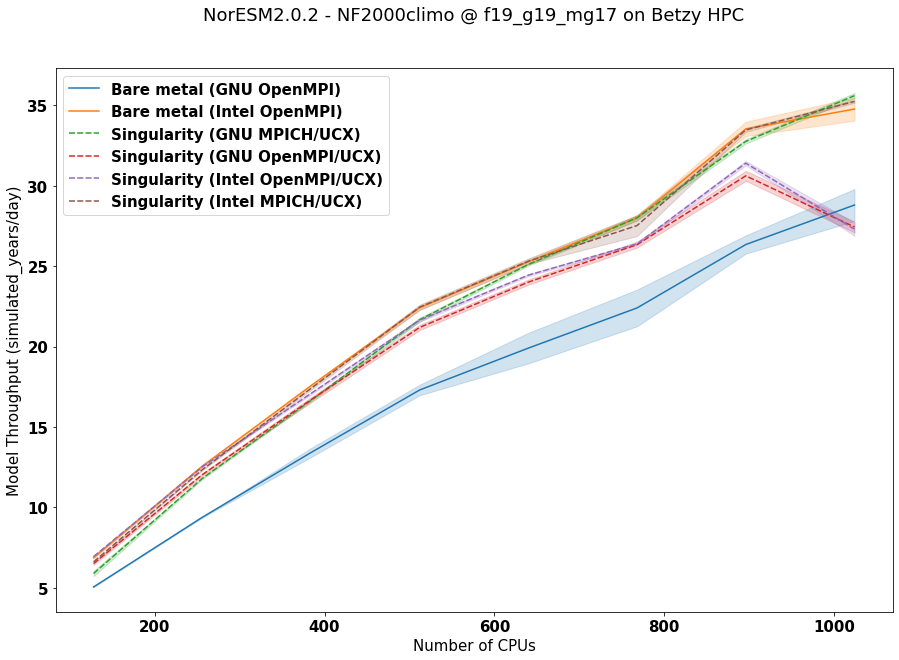

In [22]:
make_plot(df, 'throughput', "NorESM2.0.2 - NF2000climo @ f19_g19_mg17 on Betzy HPC\n", "Model Throughput (simulated_years/day)")

### Model Init Time

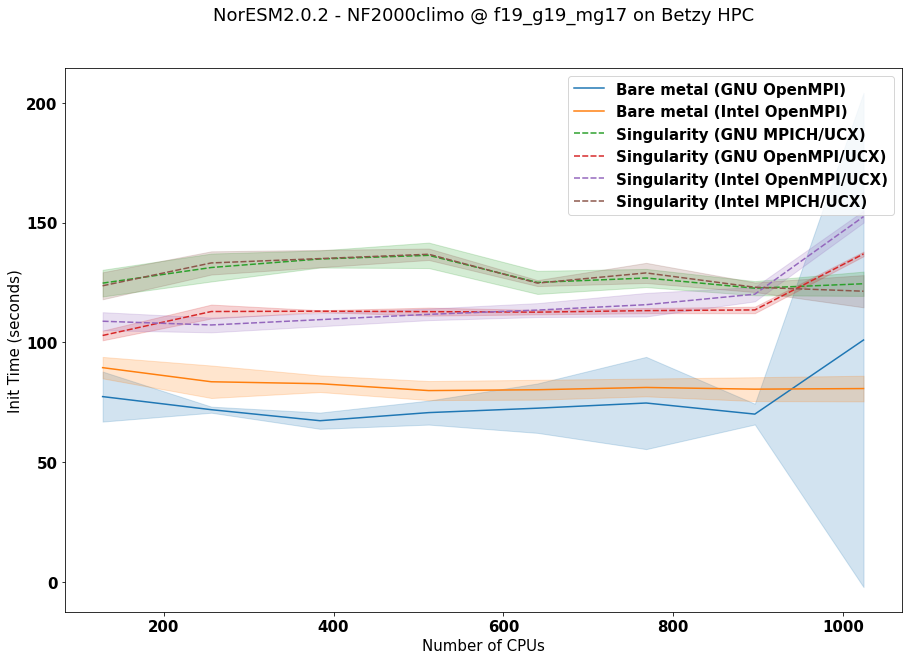

In [23]:
make_plot(df, 'initime', "NorESM2.0.2 - NF2000climo @ f19_g19_mg17 on Betzy HPC\n", "Init Time (seconds)")

### Model Run Time

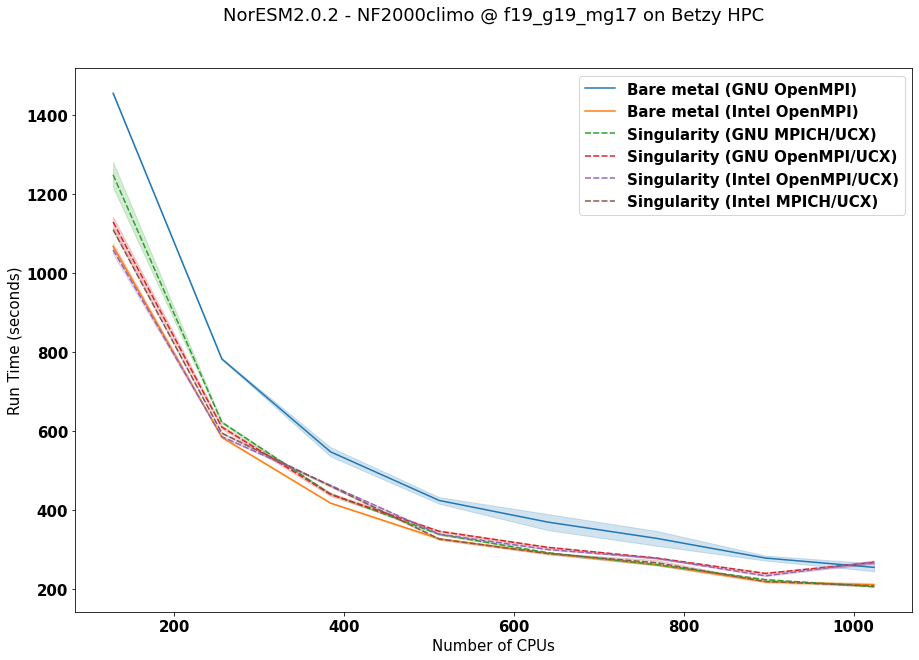

In [24]:
make_plot(df, 'runtime', "NorESM2.0.2 - NF2000climo @ f19_g19_mg17 on Betzy HPC\n", "Run Time (seconds)")